In [1]:
import pandas as pd
import numpy as np

# loading training data and testing data
train_data = pd.read_csv('Rchrg_Train.csv')
test_data = pd.read_csv('Rchrg_Test.csv')

print('Read {} training data and {} testing data  ...'.format(train_data.shape, test_data.shape))
train_data.head()

Read (38000, 17) training data and (2000, 17) testing data  ...


,AON,DORMANCY_DAY_CNT,UC_TOT_RVN_AMT,VAS_TOT_RVN_AMT,SBRP_TOT_RVN_AMT,VOICE_SBRP_TOT_RVN_AMT,VOICE_TOT_ONNET_OG_RVN_AMT,VOICE_TOT_OFFNET_OG_RVN_AMT,VOICE_TOT_ISD_OG_RVN_AMT,INTERCONNECT_RVN,DATA_SBRP_TOT_RVN_AMT,DATA_UC_TOT_RVN_AMT,VOICE_OG_TOT_USG,VOICE_IC_TOT_USG,DATA_TOT_USG_MB,RVN_AMT,RCHRG_FLAG
0,1696,0,1185.00,0.0,760.9524,0.0,292.0,833.00,0.0,267.1667,760.9524,0.0,51.066667,36.583333,773.953802,1945.9524,1
1,1696,12,0.00,0.0,0.0000,0.0,0.0,0.00,0.0,0.0000,0.0000,0.0,0.000000,0.000000,0.000000,0.0000,0
2,1696,3,0.00,0.0,0.0000,0.0,0.0,0.00,0.0,14.5000,0.0000,0.0,0.000000,1.933333,0.000000,0.0000,0
3,1695,0,103.34,0.0,0.0000,0.0,0.0,103.34,0.0,975.8335,0.0000,0.0,3.700000,67.816667,0.000000,103.3400,0
4,1695,4,0.00,0.0,0.0000,0.0,0.0,0.00,0.0,244.5834,0.0000,0.0,0.000000,14.450000,0.000000,0.0000,0


In [2]:
# There are total 17 feaures and we will not be taking VOICE_SBRP_TOT_RVN_AMT, VOICE_TOT_ISD_OG_RVN_AMT since those are least important in classifying RECHARGE and non-RECHARGE customers
# In this classification, we will set Targe value to RCHRG_FLAG

x_train = train_data.drop(['VOICE_SBRP_TOT_RVN_AMT', 'VOICE_TOT_ISD_OG_RVN_AMT', 'RCHRG_FLAG'], axis=1)
x_test = test_data.drop(['VOICE_SBRP_TOT_RVN_AMT', 'VOICE_TOT_ISD_OG_RVN_AMT', 'RCHRG_FLAG'], axis=1)
y_train = train_data.drop(['AON', 'DORMANCY_DAY_CNT', 'UC_TOT_RVN_AMT', 'VAS_TOT_RVN_AMT', 'SBRP_TOT_RVN_AMT','VOICE_SBRP_TOT_RVN_AMT','VOICE_TOT_ONNET_OG_RVN_AMT','VOICE_TOT_OFFNET_OG_RVN_AMT','VOICE_TOT_ISD_OG_RVN_AMT','INTERCONNECT_RVN','DATA_SBRP_TOT_RVN_AMT','DATA_UC_TOT_RVN_AMT','VOICE_OG_TOT_USG','VOICE_IC_TOT_USG','DATA_TOT_USG_MB','RVN_AMT'], axis=1)
y_test= test_data.drop(['AON', 'DORMANCY_DAY_CNT', 'UC_TOT_RVN_AMT', 'VAS_TOT_RVN_AMT', 'SBRP_TOT_RVN_AMT','VOICE_SBRP_TOT_RVN_AMT','VOICE_TOT_ONNET_OG_RVN_AMT','VOICE_TOT_OFFNET_OG_RVN_AMT','VOICE_TOT_ISD_OG_RVN_AMT','INTERCONNECT_RVN','DATA_SBRP_TOT_RVN_AMT','DATA_UC_TOT_RVN_AMT','VOICE_OG_TOT_USG','VOICE_IC_TOT_USG','DATA_TOT_USG_MB','RVN_AMT'], axis=1)
print('Read {} training data (X) and {} testing data(X), preprocessing ...'.format(x_train.shape, x_test.shape))
print('Read {} training data (X) and {} testing data(Y), preprocessing ...'.format(y_train.shape, y_test.shape))

Read (38000, 14) training data (X) and (2000, 14) testing data(X), preprocessing ...
Read (38000, 1) training data (X) and (2000, 1) testing data(Y), preprocessing ...


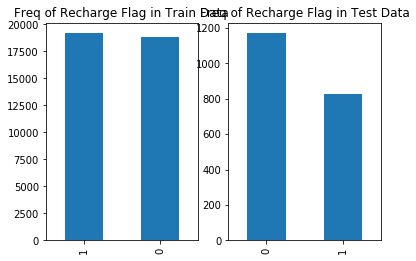

In [5]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

# plotting frequency of Target values in Train and Test Data

fig, ax = plt.subplots(nrows=1, ncols=2)
plt.subplot(1, 2, 1)
y_train['RCHRG_FLAG'].value_counts().plot.bar(title="Freq of Recharge Flag in Train Data")

plt.subplot(1, 2, 2)
y_test['RCHRG_FLAG'].value_counts().plot.bar(title="Freq of Recharge Flag in Test Data")

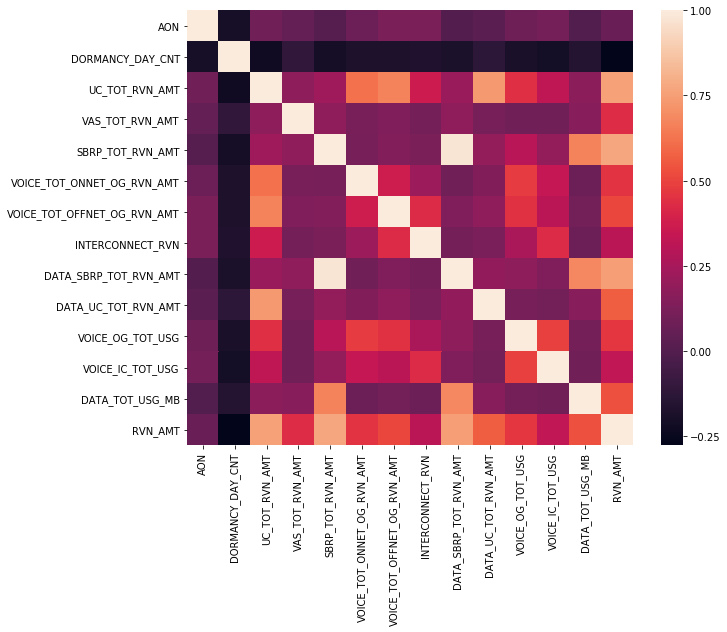

In [6]:
f, ax = plt.subplots(figsize=(10, 8))
corr = x_train.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

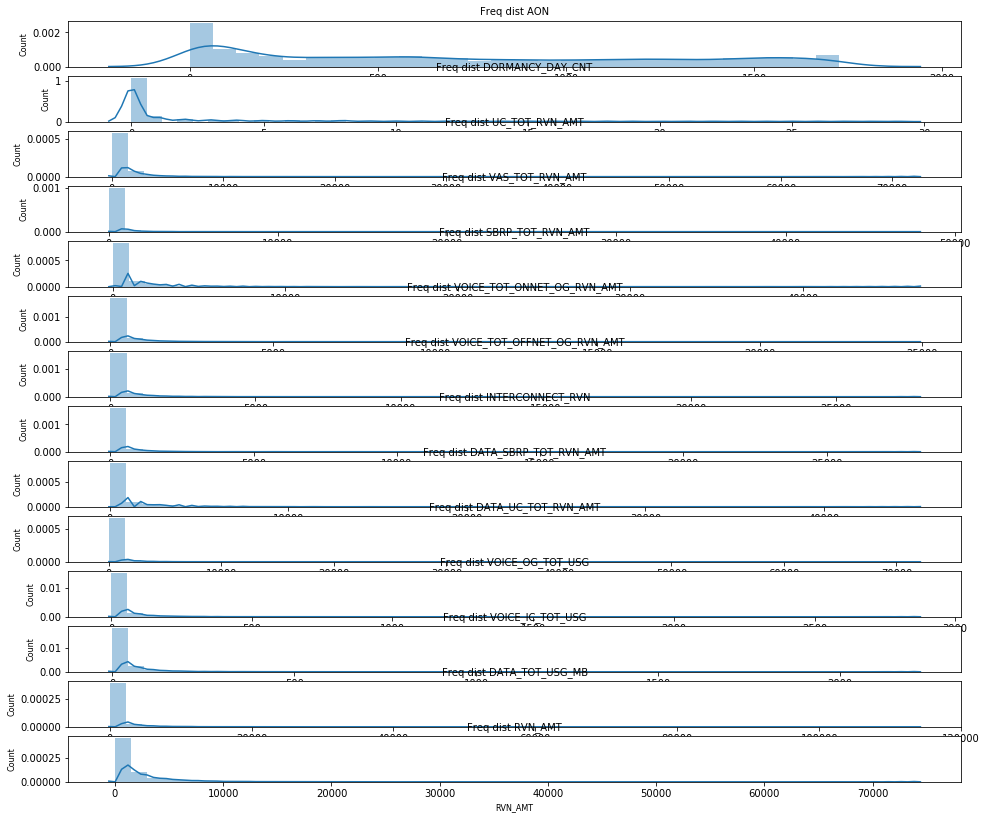

In [9]:
col_names = ['AON', 'DORMANCY_DAY_CNT', 'UC_TOT_RVN_AMT', 'VAS_TOT_RVN_AMT', 'SBRP_TOT_RVN_AMT','VOICE_TOT_ONNET_OG_RVN_AMT','VOICE_TOT_OFFNET_OG_RVN_AMT','INTERCONNECT_RVN','DATA_SBRP_TOT_RVN_AMT','DATA_UC_TOT_RVN_AMT','VOICE_OG_TOT_USG','VOICE_IC_TOT_USG','DATA_TOT_USG_MB','RVN_AMT']

fig, ax = plt.subplots(len(col_names), figsize=(16,14))

for i, col_val in enumerate(col_names):

    sns.distplot(x_train[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [10]:
train_data.AON.describe()

count    38000.00000
mean       707.00650
std        558.39966
min          0.00000
25%        159.00000
50%        604.50000
75%       1208.25000
max       1727.00000
Name: AON, dtype: float64

In [11]:
train_data.DORMANCY_DAY_CNT.describe()

count    38000.000000
mean         3.363132
std          6.617707
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         29.000000
Name: DORMANCY_DAY_CNT, dtype: float64

In [12]:
train_data.UC_TOT_RVN_AMT.describe()

count    38000.000000
mean       756.474572
std       1646.903957
min          0.000000
25%          0.000000
50%        133.545000
75%        895.240000
max      72290.550000
Name: UC_TOT_RVN_AMT, dtype: float64

In [13]:
train_data.VAS_TOT_RVN_AMT.describe()

count    38000.000000
mean       145.484336
std        614.664652
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      47971.000000
Name: VAS_TOT_RVN_AMT, dtype: float64

In [14]:
train_data.SBRP_TOT_RVN_AMT.describe()

count    38000.000000
mean       708.077226
std       1681.191242
min          0.000000
25%          0.000000
50%          0.000000
75%        760.952400
max      46588.571500
Name: SBRP_TOT_RVN_AMT, dtype: float64

In [15]:
train_data.VOICE_TOT_ONNET_OG_RVN_AMT.describe()

count    38000.000000
mean       217.644417
std        595.246223
min          0.000000
25%          0.000000
50%          0.000000
75%        180.000000
max      24897.240000
Name: VOICE_TOT_ONNET_OG_RVN_AMT, dtype: float64

In [17]:
train_data.VOICE_TOT_OFFNET_OG_RVN_AMT.describe()

count    38000.000000
mean       240.144717
std        651.446427
min          0.000000
25%          0.000000
50%          0.000000
75%        203.977500
max      27867.350000
Name: VOICE_TOT_OFFNET_OG_RVN_AMT, dtype: float64

In [18]:
train_data.INTERCONNECT_RVN.describe()

count    38000.000000
mean       209.042857
std        594.543711
min          0.000000
25%          0.000000
50%         18.000000
75%        185.583400
max      28219.452400
Name: INTERCONNECT_RVN, dtype: float64

In [19]:
train_data.DATA_SBRP_TOT_RVN_AMT.describe()

count    38000.000000
mean       622.497611
std       1607.923271
min          0.000000
25%          0.000000
50%          0.000000
75%        151.428600
max      45352.381000
Name: DATA_SBRP_TOT_RVN_AMT, dtype: float64

In [20]:
train_data.DATA_UC_TOT_RVN_AMT.describe()

count    38000.000000
mean       250.910806
std        973.695004
min          0.000000
25%          0.000000
50%          0.000000
75%         41.405000
max      72122.610000
Name: DATA_UC_TOT_RVN_AMT, dtype: float64

In [21]:
train_data.VOICE_OG_TOT_USG.describe()

count    38000.000000
mean        30.581021
std         79.190316
min          0.000000
25%          0.000000
50%          3.616667
75%         28.650000
max       2868.000000
Name: VOICE_OG_TOT_USG, dtype: float64

In [22]:
train_data.VOICE_IC_TOT_USG.describe()

count    38000.000000
mean        31.470021
std         73.427136
min          0.000000
25%          0.000000
50%          6.033333
75%         32.150000
max       2210.866667
Name: VOICE_IC_TOT_USG, dtype: float64

In [23]:
train_data.DATA_TOT_USG_MB.describe()

count     38000.000000
mean        818.994131
std        2604.197058
min           0.000000
25%           0.000000
50%           0.000165
75%         435.449742
max      114136.638900
Name: DATA_TOT_USG_MB, dtype: float64

In [24]:
train_data.RVN_AMT.describe()

count    38000.000000
mean      1634.918736
std       2842.899784
min          0.000000
25%          0.000000
50%        596.760000
75%       2005.135000
max      73847.690000
Name: RVN_AMT, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


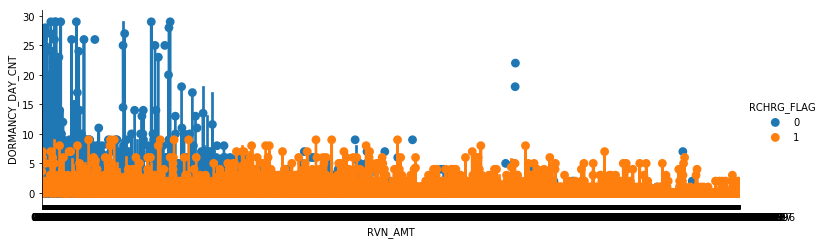

In [25]:
ax = sns.factorplot(x="RVN_AMT", y="DORMANCY_DAY_CNT", \
                    data=train_data, hue='RCHRG_FLAG', \
                    size=3.5, aspect=3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


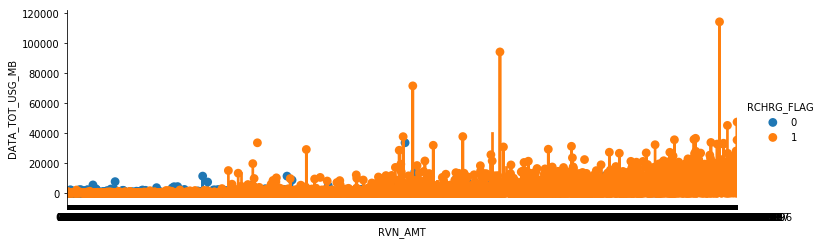

In [27]:
ax = sns.factorplot(x="RVN_AMT", y="DATA_TOT_USG_MB", \
                    data=train_data, hue='RCHRG_FLAG', \
                    size=3.5, aspect=3)

In [28]:
train_data.describe()

,AON,DORMANCY_DAY_CNT,UC_TOT_RVN_AMT,VAS_TOT_RVN_AMT,SBRP_TOT_RVN_AMT,VOICE_SBRP_TOT_RVN_AMT,VOICE_TOT_ONNET_OG_RVN_AMT,VOICE_TOT_OFFNET_OG_RVN_AMT,VOICE_TOT_ISD_OG_RVN_AMT,INTERCONNECT_RVN,DATA_SBRP_TOT_RVN_AMT,DATA_UC_TOT_RVN_AMT,VOICE_OG_TOT_USG,VOICE_IC_TOT_USG,DATA_TOT_USG_MB,RVN_AMT,RCHRG_FLAG
count,38000.00000,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000
mean,707.00650,3.363132,756.474572,145.484336,708.077226,82.642855,217.644417,240.144717,14.585849,209.042857,622.497611,250.910806,30.581021,31.470021,818.994131,1634.918736,0.504474
std,558.39966,6.617707,1646.903957,614.664652,1681.191242,363.792234,595.246223,651.446427,219.963042,594.543711,1607.923271,973.695004,79.190316,73.427136,2604.197058,2842.899784,0.499987
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,159.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,604.50000,0.000000,133.545000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,3.616667,6.033333,0.000165,596.760000,1.000000
75%,1208.25000,3.000000,895.240000,0.000000,760.952400,0.000000,180.000000,203.977500,0.000000,185.583400,151.428600,41.405000,28.650000,32.150000,435.449742,2005.135000,1.000000
max,1727.00000,29.000000,72290.550000,47971.000000,46588.571500,12980.000100,24897.240000,27867.350000,14666.080000,28219.452400,45352.381000,72122.610000,2868.000000,2210.866667,114136.638900,73847.690000,1.000000


In [29]:
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# X_train, X_test, y_train, y_test = train_test_split( x_train, y_train, test_size = 0.3, random_state = 100)

clf_gini = DecisionTreeClassifier(criterion='gini', random_state=100, splitter='best')
clf_gini.fit(x_train, y_train)
y_pred_gini = clf_gini.predict(x_test)
gini_accuracy = accuracy_score(y_test, y_pred_gini)*100
print("Decision Tree by Gini Accuracy Score is {}", format(gini_accuracy))

Decision Tree by Gini Accuracy Score is {} 88.2


In [30]:
from sklearn.ensemble import AdaBoostClassifier

clf_ada = AdaBoostClassifier(learning_rate=0.1, n_estimators = 1000, random_state = 42)
clf_ada.fit(x_train, y_train)
y_pred_ada = clf_ada.predict(x_test)
y_pred_ada
ada_accuracy = accuracy_score(y_test, y_pred_ada)*100
print("AdaBoost Classifer Accuracy Score is {}", format(ada_accuracy))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost Classifer Accuracy Score is {} 91.85


In [31]:
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
clf_rf.fit(x_train, y_train);

y_pred_rf = clf_rf.predict(x_test)
y_pred_rf = np.around(y_pred_rf)
y_pred_rf = y_pred_rf.astype(int)

rf_accuracy = accuracy_score(y_test, y_pred_rf)*100
print("Random Forest Classifer Accuracy Score is {}", format(rf_accuracy))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest Classifer Accuracy Score is {} 92.5
